In [1]:
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.losses import Loss
from calibration_stats import ExpectedCalibrationError
import time 
from matplotlib import pyplot as plt

In [16]:
import sys
sys.path.insert(1, '/home/thlarsen/ood_detection')

from helper import load_dataset_sev, load_dataset_c, load_mnist_model, rgb_img_to_vec


In [17]:
model = load_mnist_model(lr=1e-5, w=.1) 

shift = Gaussian Noise


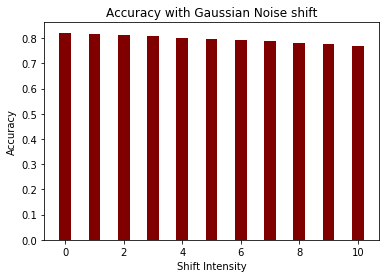

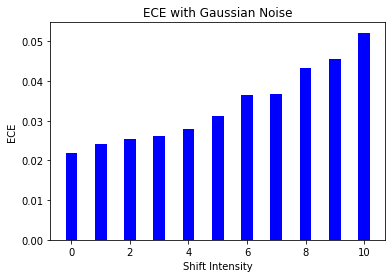

shift = Shot Noise


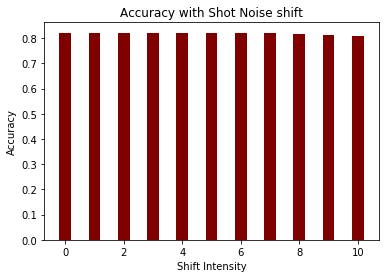

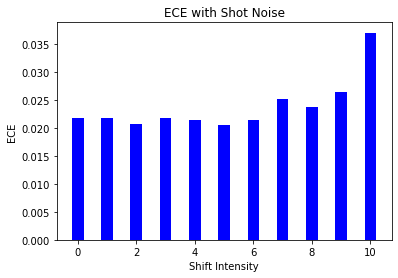

shift = Impulse Noise


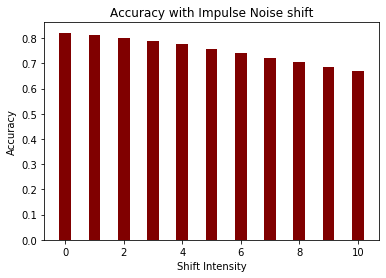

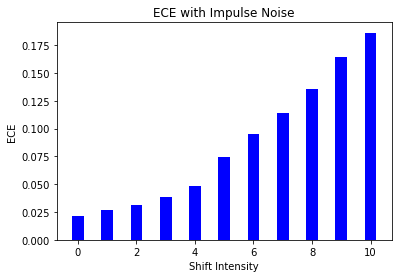

shift = Defocus Blur


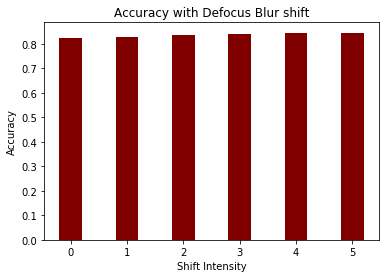

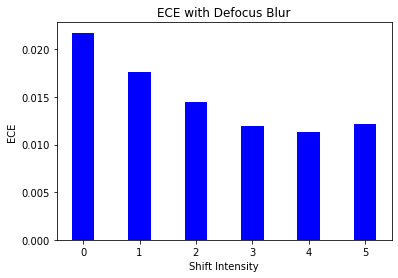

shift = Glass Blur


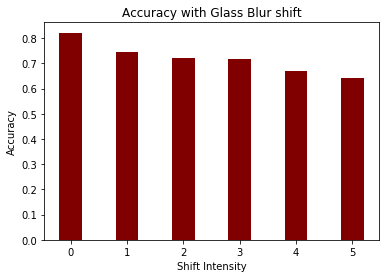

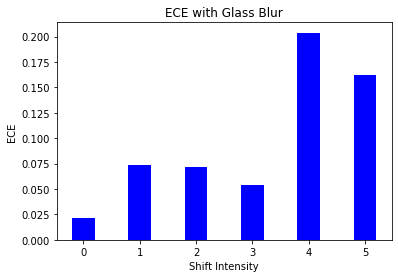

shift = Motion Blur


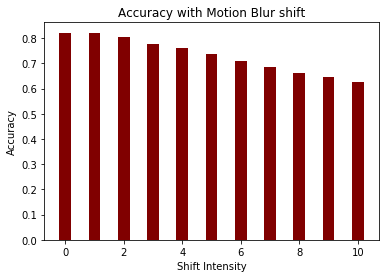

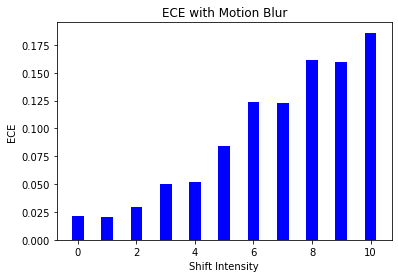

shift = Zoom Blur


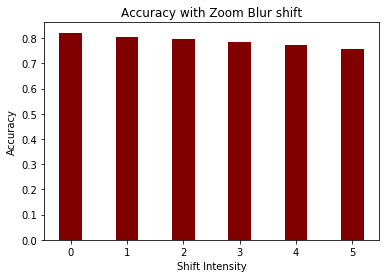

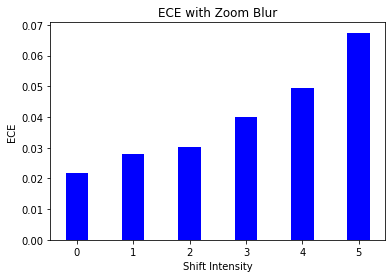

shift = Snow


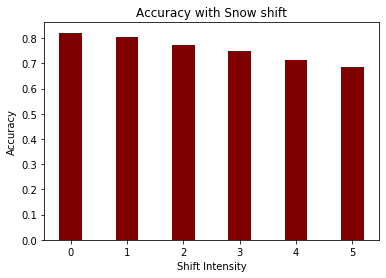

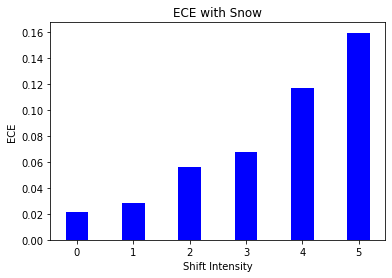

shift = Fog


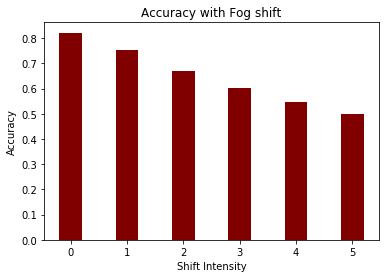

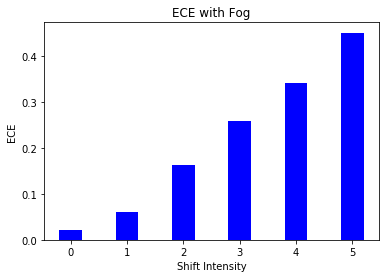

shift = Brightness


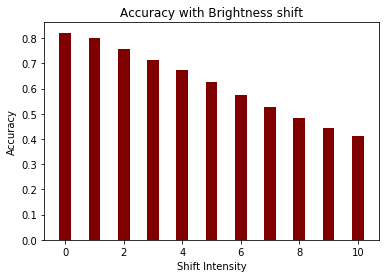

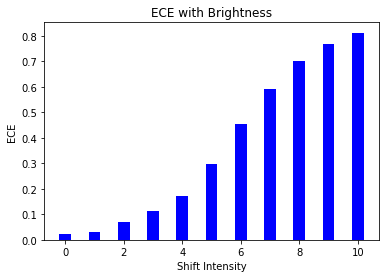

shift = Contrast


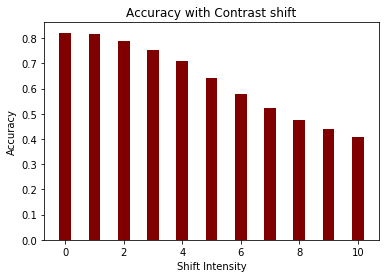

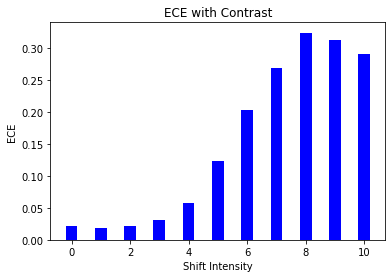

shift = Elastic


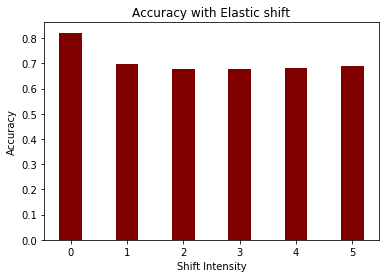

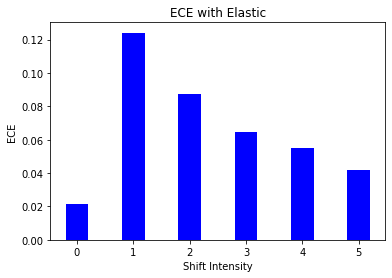

shift = Pizelate


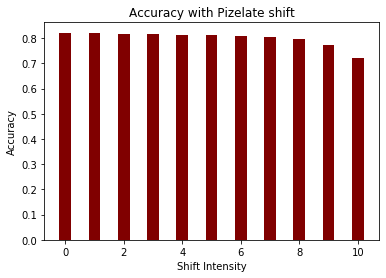

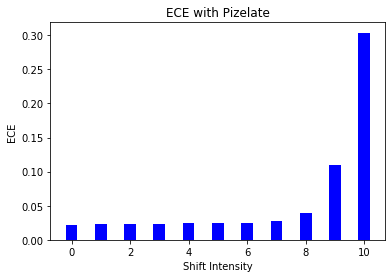

shift = JPEG


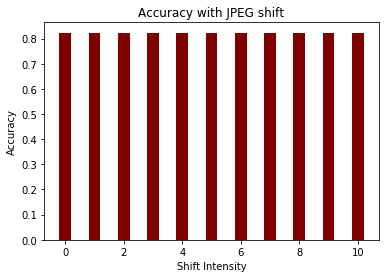

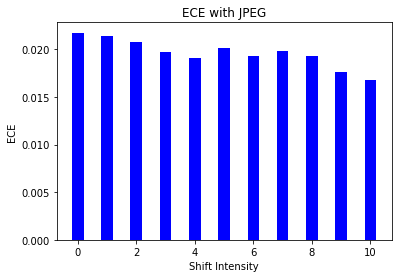

shift = Speckle Noise


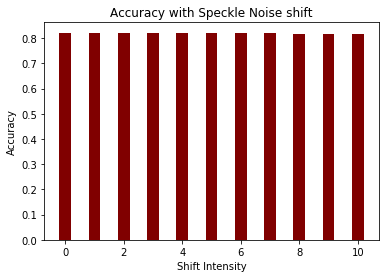

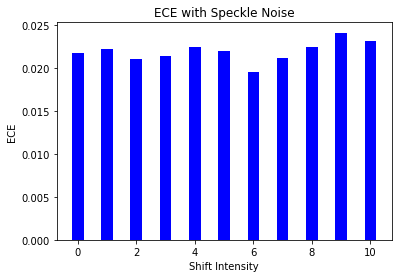

shift = Gaussian Blur


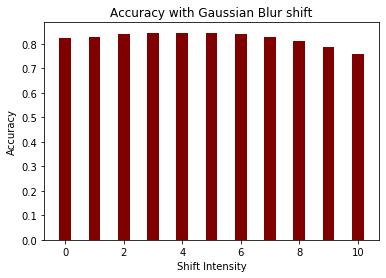

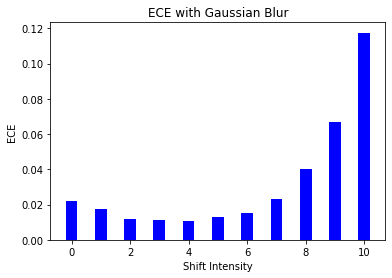

shift = Spatter


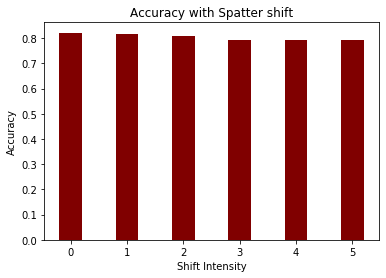

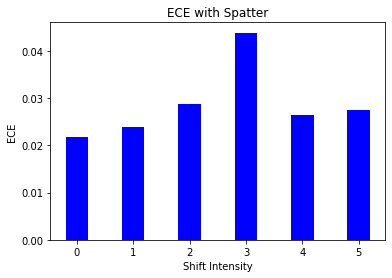

shift = Saturate


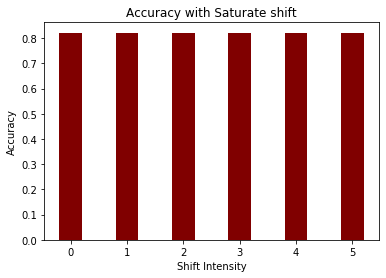

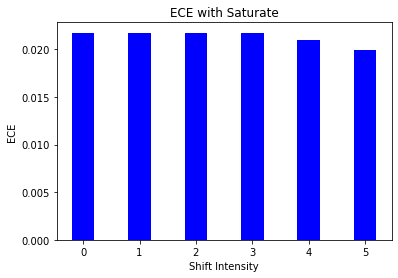

In [22]:
from helper import distribution_shifts
prefix = '/home/thlarsen/ood_detection/learn_uncertainty/'

# data, labels, sev = load_dataset_c('gaussian_noise','mnist_c')
# print(np.array(data).shape)
# print(np.array(labels).shape)
# print(np.array(sev).shape)


for shift in distribution_shifts.keys(): 
    shift_name = distribution_shifts[shift]
    print(f"shift = {shift_name}")
    data_by_sev = load_dataset_sev(shift, dataset='mnist')

    acc = []
    ece = []

    acc_fn = keras.metrics.Accuracy()
    ECE = ExpectedCalibrationError()

    for sev in data_by_sev.keys(): 
        data_s, labels_s = data_by_sev[sev]

        preds = model.predict(np.reshape(np.mean(data_s, axis=3), (-1, 1024)))

        acc.append(acc_fn(labels_s, tf.argmax(preds, axis=1)))
        ece.append(ECE.call(labels_s, preds))
#         print(f" acc = {acc[-1]}")
#         print(f" ece = {ece[-1]}")
    plt.bar(range(len(acc)), acc, color ='maroon',
        width = 0.4)
 
    plt.xlabel("Shift Intensity")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy with {shift_name} shift")
    plt.savefig(prefix + f"mnist_graphs/{shift}_acc.png")
    plt.show()

    plt.bar(range(len(ece)), ece, color ='blue',
            width = 0.4)

    plt.xlabel("Shift Intensity")
    plt.ylabel("ECE")
    plt.title(f"ECE with {shift_name}")
    plt.savefig(prefix + f"graphs/{shift}_ece.png")

    plt.show()

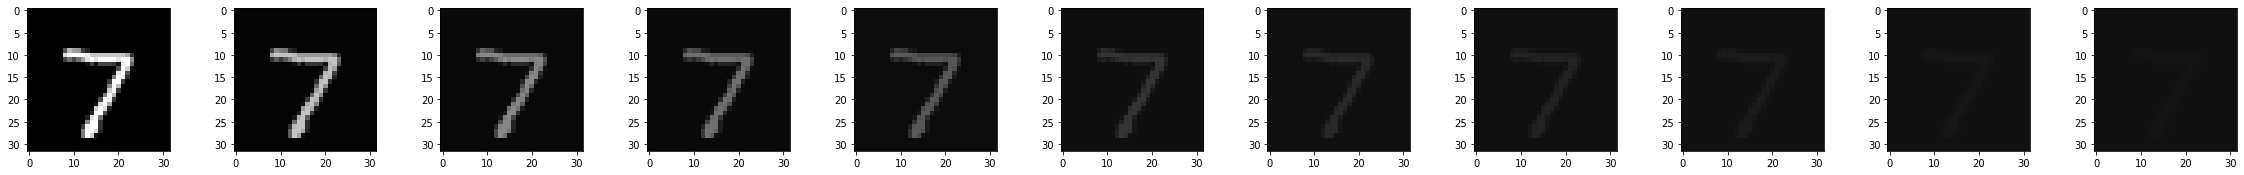

In [34]:
A=0
B=50000
x=0

data_by_sev = load_dataset_sev('contrast', dataset='mnist')
# print(np.array(data).shape)
# print(np.array(labels).shape)
# print(np.array(sev).shape)

fig, axes = plt.subplots(nrows=1, ncols=len(data_by_sev.keys()), figsize=(32, 32))
fig.tight_layout(pad=3.0)

for sev in data_by_sev.keys(): 
    data_s, labels_s = data_by_sev[sev]    
#     print(f'label={labels[i]}, sev={sev[i]}')
    axes[x].imshow(data_s[0])
#     axes[x].title.set_text(f'sev={sev}')
#     axes[x].set_title(f'sev={sev}', fontdict={'fontsize': 15, 'fontweight': 'medium'})
#     axes[x].set_fontsize(20)

    x+=1
plt.show()
    

In [ ]:
acc_fn = keras.metrics.SparseCategoricalAccuracy()
ece = ExpectedCalibrationError()

In [ ]:
acc = []
ece = []

acc_fn = keras.metrics.Accuracy()
ECE = ExpectedCalibrationError()

for sev in mnist_by_sev.keys(): 
    data_s, labels_s = mnist_by_sev[sev]
    data_s = rgb_img_to_vec(data_s)

    preds = model.predict(np.reshape(data_s, (-1, 1024)))
    acc.append(acc_fn(labels_s, tf.argmax(preds, axis=1)))
    ece.append(ECE.call(labels_s, preds))
    print(f" acc = {acc[-1]}")
    print(f" ece = {ece[-1]}")


In [ ]:
if len(acc) == 5:
    acc = [.98] + acc 
    ece = [.04] + ece

plt.bar(range(0, 6), acc, color ='maroon',
        width = 0.4)
 
plt.xlabel("Shift Intensity")
plt.ylabel("Accuracy")
# plt.title("Students enrolled in different courses")
plt.show()

# plot.plot(range(5), ece)
plt.bar(range(0, 6), ece, color ='blue',
        width = 0.4)
plt.xlabel("Shift Intensity")
plt.ylabel("ECE")
plt.ylim(top=0.12)

# plt.title("Students enrolled in different courses")
plt.show()

# for sev in range(5): 
    
#     print(f'label={labels[i]}, sev={sev[i]}')
#     axes[x].imshow(data[i])
#     axes[x].title.set_text(f'sev={sev[i]}')
#     ax.set_title(f'sev={sev[i]}', fontdict={'fontsize': 15, 'fontweight': 'medium'})
#     axes.set_fontsize(20)

#     x+=1
#     plt.show()

shift = Gaussian Noise


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.